In [2]:
import matplotlib.pyplot as plt
import functions as f
import classes as c

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
def testDTClassifier(training_inputs, training_targets, estimators=50, components=11, depth=5):
    X_train, X_test, y_train, y_test = train_test_split(training_inputs, training_targets, test_size=0.7)
    # Create an instance of the BoostedGaussianNaiveBayesClassifier
    boosted_dt_classifier = c.BoostedDecisionTreeClassifier(n_estimators=estimators, n_components=components, max_depth=depth)

    # Fit the classifier on the training data
    boosted_dt_classifier.fit(X_train, y_train)

    # Make predictions on the testing data
    predicted_labels = boosted_dt_classifier.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, predicted_labels)
    accuracy *= 100
    return accuracy

In [4]:
test_df = f.getDataFrame("TrainOnMe.csv")
test_cleared_dataframe = f.clearData(test_df)
test_training_inputs, test_training_targets = f.extractData(test_cleared_dataframe)

/Users/wiktorkowalczyk/Desktop/Personal/Code/github/machine_learning/Challenge/functions.py:87: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe[column_name] = pandas.to_numeric(dataframe[column_name], errors='coerce')
/Users/wiktorkowalczyk/Desktop/Personal/Code/github/machine_learning/Challenge/functions.py:222: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe = change_type(dataframe, 'x11')


In [5]:
ITER_NUM = 40
ESTIMATOR_NUM = range(1, 100)

# Save the errors after checking each of them through cross validation
estimator_errors = []

# Randomly select the training and testing data and iterate through it
# TODO: implement the iteration and saving the errors for each parameter measured

for n in ESTIMATOR_NUM:
    iteration_error = []
    for i in range(ITER_NUM):
        iteration_error.append(1- (testDTClassifier(test_training_inputs, test_training_targets, estimators=n))/100.0 )
    estimator_errors.append(iteration_error)

99
99


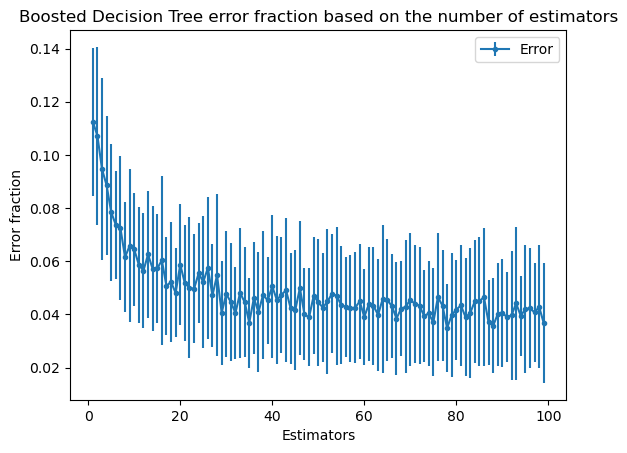

In [6]:
x = ESTIMATOR_NUM
y, e = f.calculatePlotValues(estimator_errors)
print(len(x))
print(len(y))

plt.errorbar(x, y, yerr=e, linestyle='solid', marker='.', label='Error')
plt.ylabel('Error fraction')
plt.xlabel("Estimators")
plt.title(f"""Boosted Decision Tree error fraction based on the number of estimators""")
plt.legend()

In [7]:
ITER_NUM = 40
DEPTH_NUM = range(1, 20)

# Save the errors after checking each of them through cross validation
depth_errors = []

# Randomly select the training and testing data and iterate through it
# TODO: implement the iteration and saving the errors for each parameter measured

for n in DEPTH_NUM:
    iteration_error = []
    for i in range(ITER_NUM):
        iteration_error.append(1- (testDTClassifier(test_training_inputs, test_training_targets, depth=n))/100.0 )
    depth_errors.append(iteration_error)


19
19


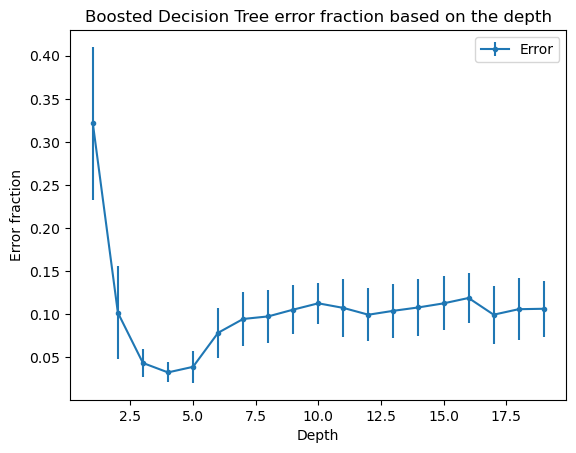

In [8]:
x = DEPTH_NUM
y, e = f.calculatePlotValues(depth_errors)
print(len(x))
print(len(y))

plt.errorbar(x, y, yerr=e, linestyle='solid', marker='.', label='Error')
plt.ylabel('Error fraction')
plt.xlabel("Depth")
plt.title(f"""Boosted Decision Tree error fraction based on the depth""")
plt.legend()

In [9]:
ITER_NUM = 80
COMP_NUM = range(1, 14)

# Save the errors after checking each of them through cross validation
comp_errors = []

# Randomly select the training and testing data and iterate through it
# TODO: implement the iteration and saving the errors for each parameter measured

for n in COMP_NUM:
    iteration_error = []
    for i in range(ITER_NUM):
        iteration_error.append(1- (testDTClassifier(test_training_inputs, test_training_targets, components=n, estimators=80, depth=5))/100.0 )
    comp_errors.append(iteration_error)

13
13


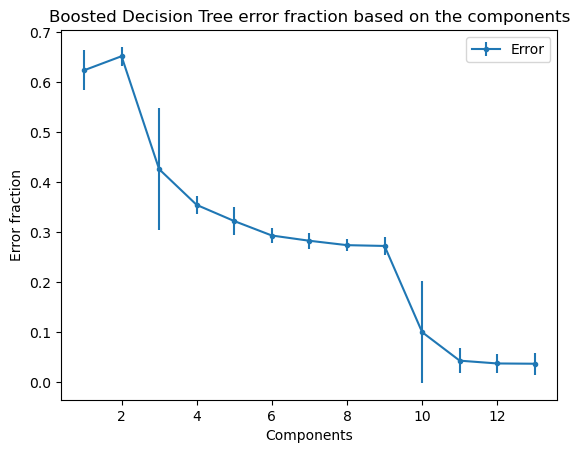

In [10]:
x = COMP_NUM
y, e = f.calculatePlotValues(comp_errors)
print(len(x))
print(len(y))

plt.errorbar(x, y, yerr=e, linestyle='solid', marker='.', label='Error')
plt.ylabel('Error fraction')
plt.xlabel("Components")
plt.title(f"""Boosted Decision Tree error fraction based on the components""")
plt.legend()